In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [2]:
def preprocessing(file_address):
    data = np.array(pd.read_csv(file_address))
    images = []
    for row in data:
        images.append(np.array_split(row[1:785],28))
    images,labels = np.array(images).astype('float'), data[...,0].astype('float')
    return images,labels
        
train_images,train_labels = preprocessing('sign_mnist_train.csv')
test_images,test_labels = preprocessing('sign_mnist_test.csv')

print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

(27455, 28, 28) (27455,)
(7172, 28, 28) (7172,)


In [3]:
train_images = np.expand_dims(train_images, axis = 3)
test_images = np.expand_dims(test_images, axis = 3)

train_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=0.2, fill_mode='nearest')
validation_gen = ImageDataGenerator(rescale=1./255)

model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128 ,activation=tf.nn.relu),
    keras.layers.Dense(26, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(
    train_gen.flow(train_images,train_labels,batch_size=50), 
    steps_per_epoch = len(train_images)/50, 
    epochs = 30, 
    validation_data= validation_gen.flow(test_images,test_labels,batch_size=32), 
    validation_steps= len(test_images)/32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
858/857 [==============================] - 13s 15ms/step - loss: 2.8322 - accuracy: 0.1431 - val_loss: 2.3630 - val_accuracy: 0.1981
Epoch 2/30
858/857 [==============================] - 15s 18ms/step - loss: 2.1347 - accuracy: 0.3296 - val_loss: 1.6034 - val_accuracy: 0.4628
Epoch 3/30
858/857 [==============================] - 18s 21ms/step - loss: 1.7449 - accuracy: 0.4429 - val_loss: 1.3714 - val_accuracy: 0.5091
Epoch 4/30
858/857 [==============================] - 20s 23ms/step - loss: 1.4974 - accuracy: 0.5179 - val_loss: 1.0284 - val_accuracy: 0.6220
Epoch 5/30
858/857 [==============================] - 21s 24ms/step - loss: 1.3302 - accuracy: 0.5653 - val_loss: 0.9265 - val_accuracy: 0.6723
Epoch 6/30
858/857 [==============================] - 24s 27ms/step - loss: 1.2031 - accuracy: 0.6044 - val_loss: 0.7168 - val_accuracy: 0.7507
Epoch 7/30
858/857 [==============================] - 25s 29

<Figure size 432x288 with 0 Axes>

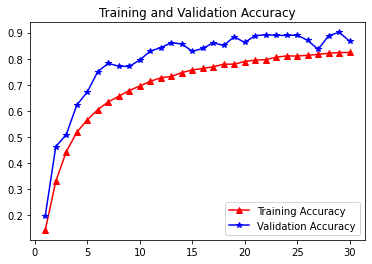

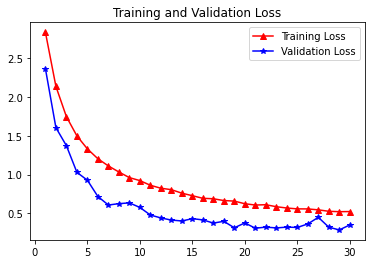

<Figure size 432x288 with 0 Axes>

In [4]:
loss,acc,val_loss,val_acc = history.history.values()
epochs = range(1,len(loss)+1)
import matplotlib.pyplot as plt
# Plot graph
plt.plot(epochs,acc,'r-^',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b-*', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'r-^',label='Training Loss')
plt.plot(epochs,val_loss,'b-*',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()
